In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
do=pd.read_csv("/content/drive/MyDrive/student_prediction.csv")
print(do)

      STUDENTID  AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  \
0      STUDENT1    2       2        3            3     1         2        2   
1      STUDENT2    2       2        3            3     1         2        2   
2      STUDENT3    2       2        2            3     2         2        2   
3      STUDENT4    1       1        1            3     1         2        1   
4      STUDENT5    2       2        1            3     2         2        1   
..          ...  ...     ...      ...          ...   ...       ...      ...   
140  STUDENT141    2       1        2            3     1         1        2   
141  STUDENT142    1       1        2            4     2         2        2   
142  STUDENT143    1       1        1            4     2         2        2   
143  STUDENT144    2       1        2            4     1         1        1   
144  STUDENT145    1       1        1            5     2         2        2   

     SALARY  TRANSPORT  ...  PREP_STUDY  PREP_EXAM 

In [15]:
do.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [16]:
f=do['STUDENTID']
d=do.drop('STUDENTID',axis=1)

In [17]:
print(d)

     AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  SALARY  \
0      2       2        3            3     1         2        2       1   
1      2       2        3            3     1         2        2       1   
2      2       2        2            3     2         2        2       2   
3      1       1        1            3     1         2        1       2   
4      2       2        1            3     2         2        1       3   
..   ...     ...      ...          ...   ...       ...      ...     ...   
140    2       1        2            3     1         1        2       1   
141    1       1        2            4     2         2        2       1   
142    1       1        1            4     2         2        2       1   
143    2       1        2            4     1         1        1       5   
144    1       1        1            5     2         2        2       3   

     TRANSPORT  LIVING  ...  PREP_STUDY  PREP_EXAM  NOTES  LISTENS  \
0            1       1  ...  

In [18]:
y=d['GRADE']
x=d.drop('GRADE',axis=1)

In [19]:
for i in range(len(y)):
  if y[i]>=3.5:
    y[i]=1
  else:
    y[i]=0
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    0
143    1
144    0
Name: GRADE, Length: 145, dtype: int64


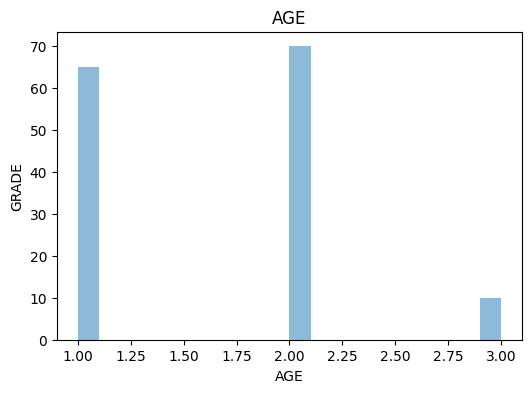

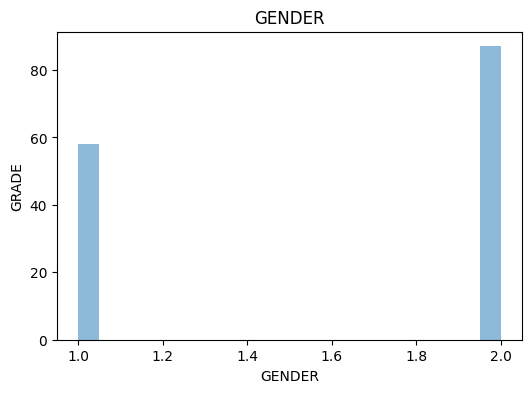

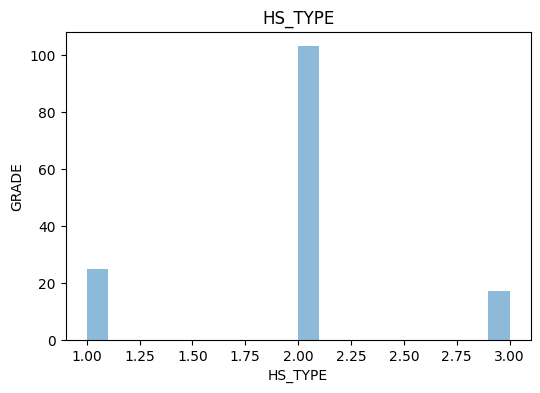

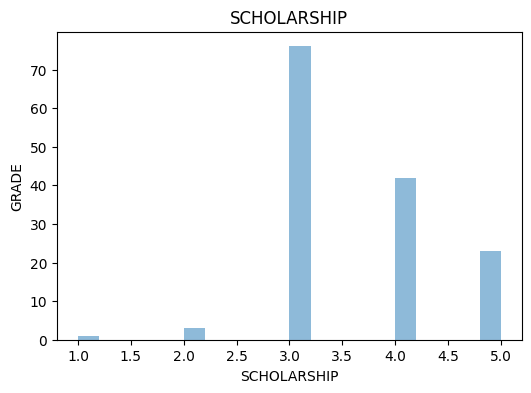

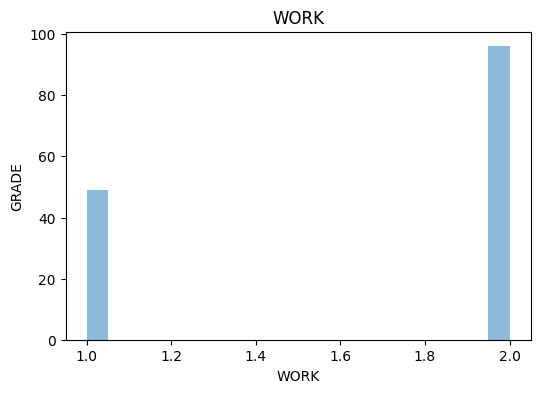

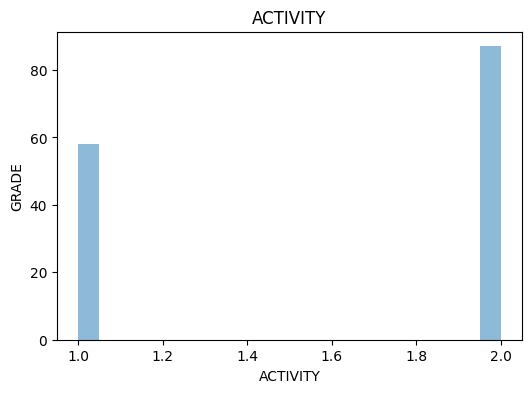

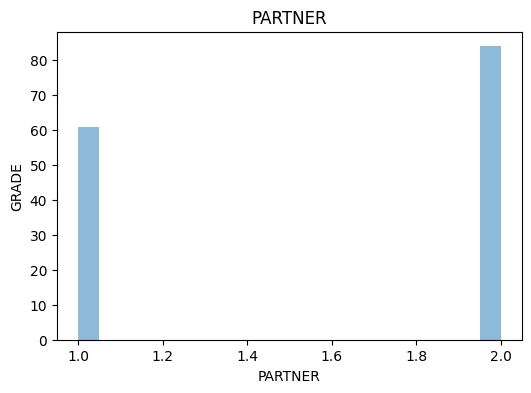

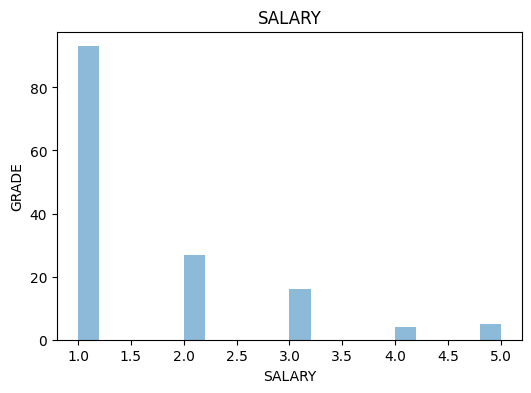

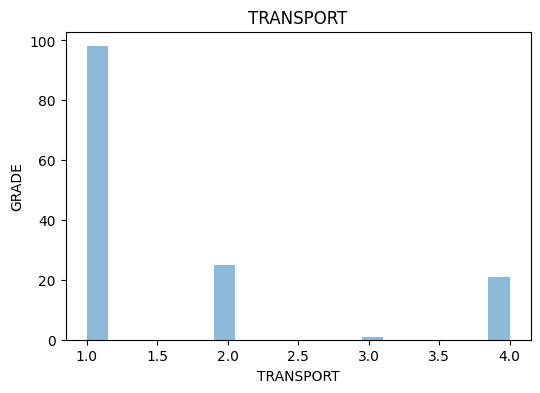

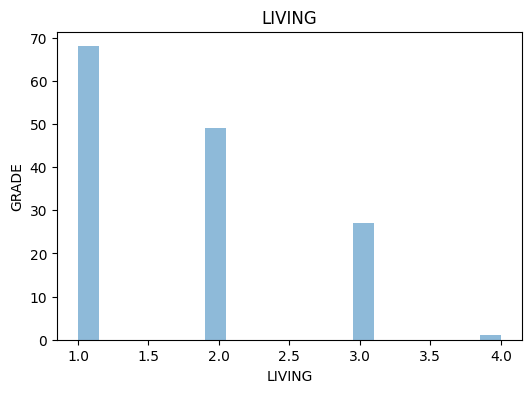

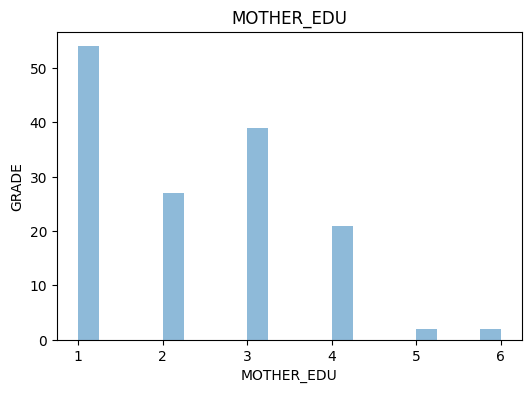

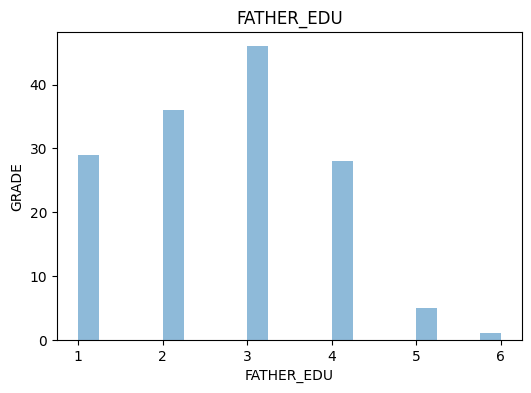

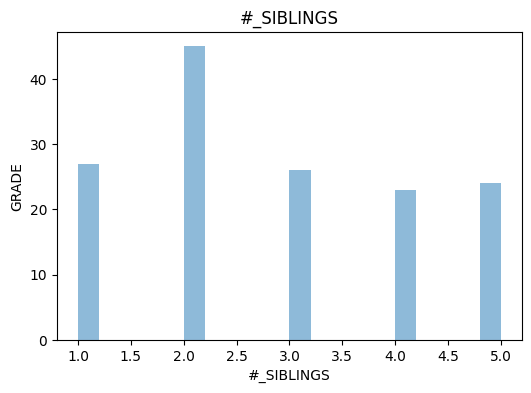

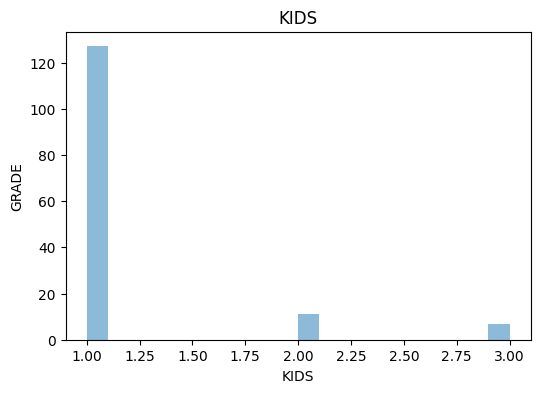

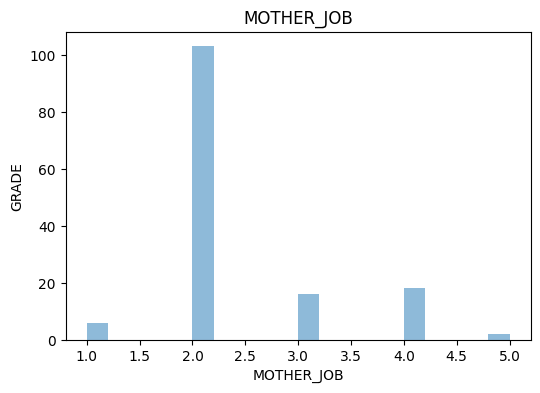

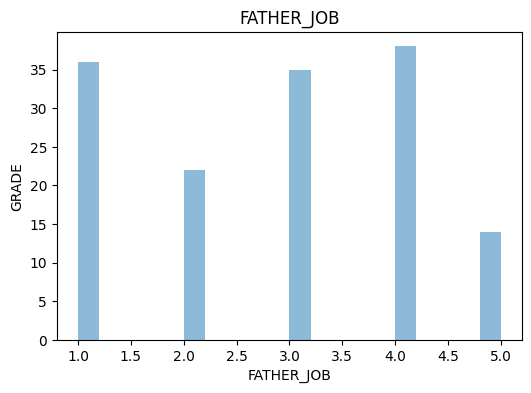

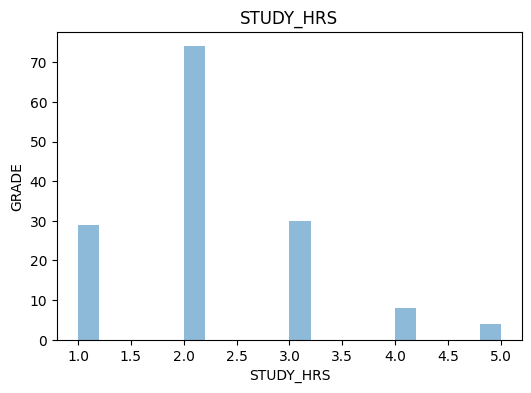

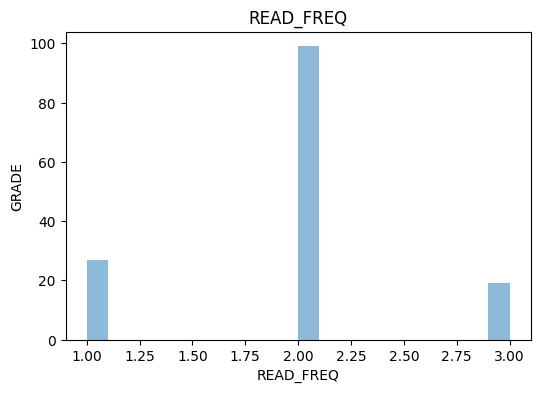

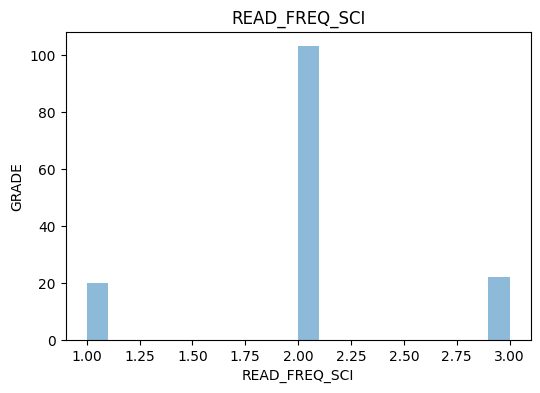

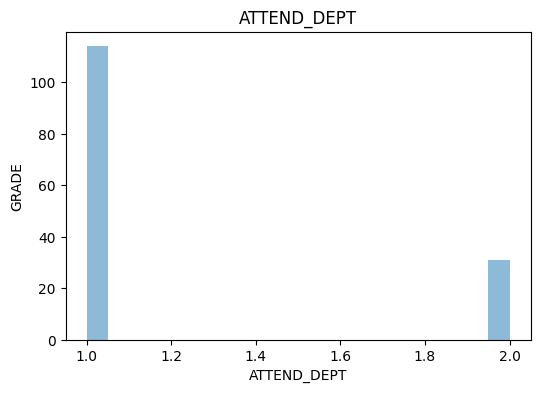

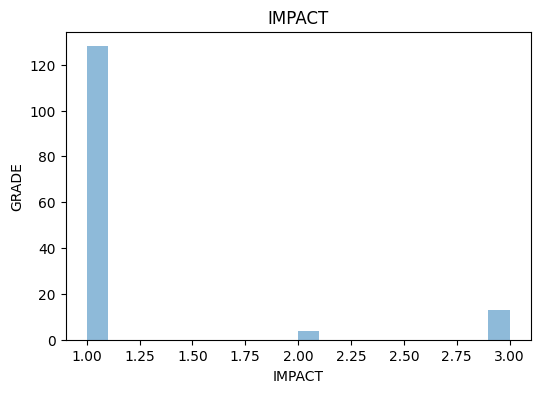

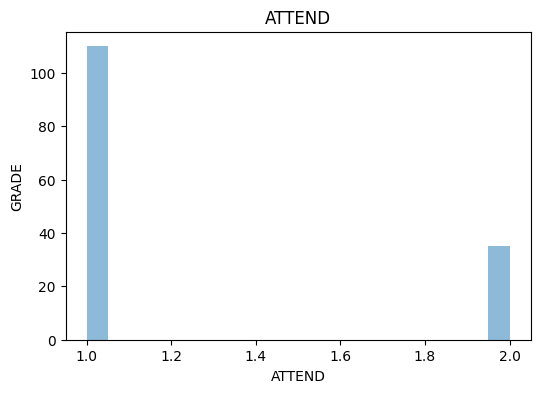

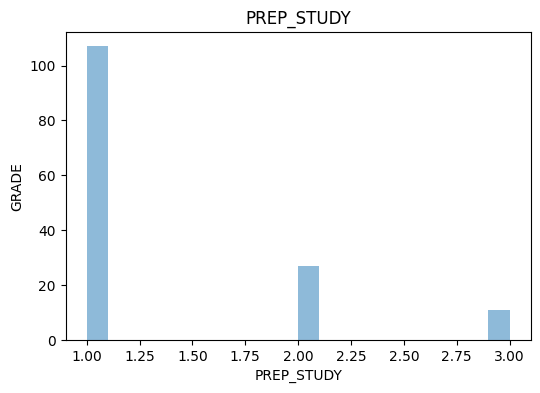

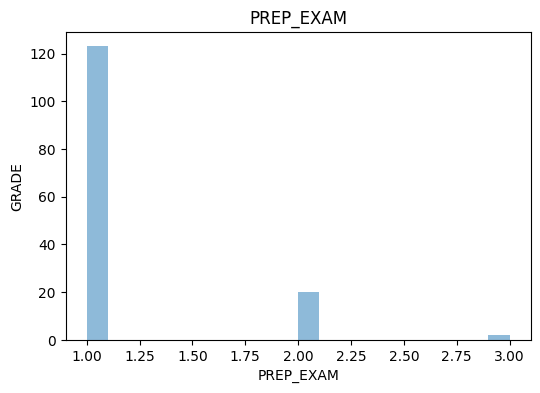

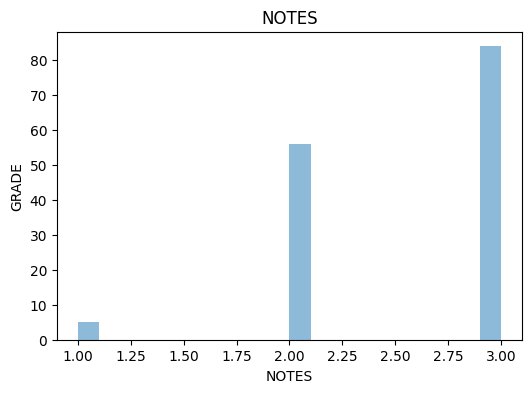

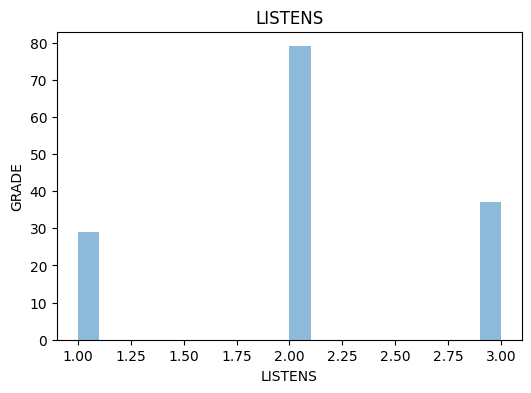

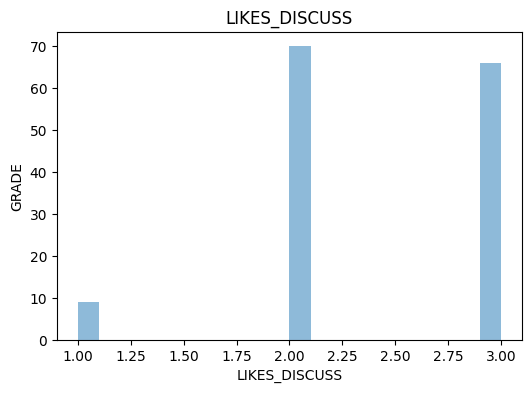

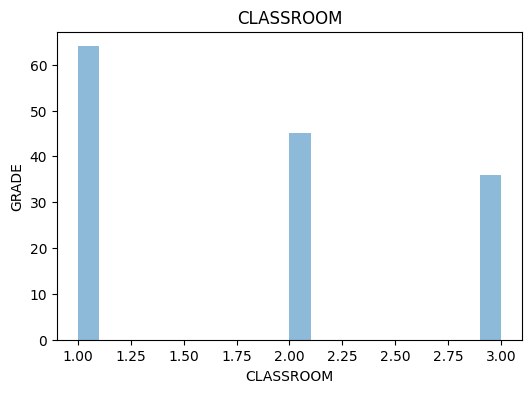

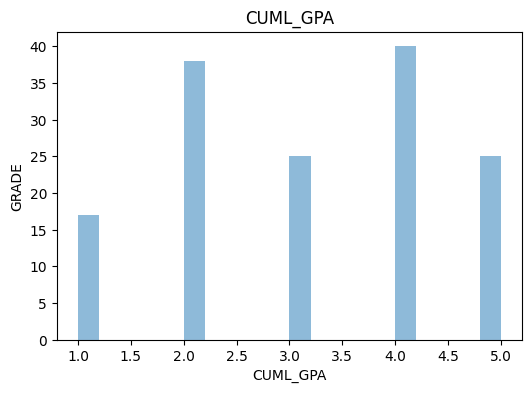

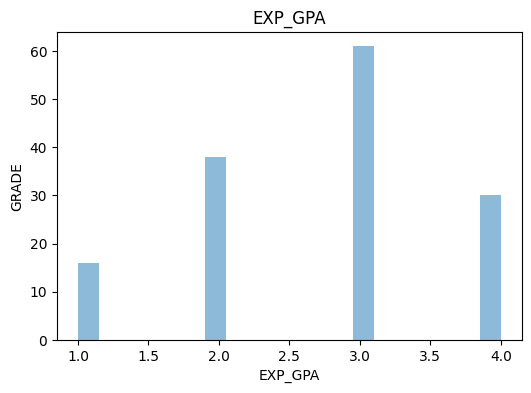

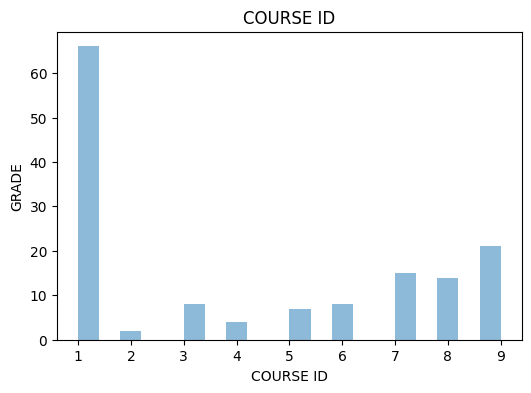

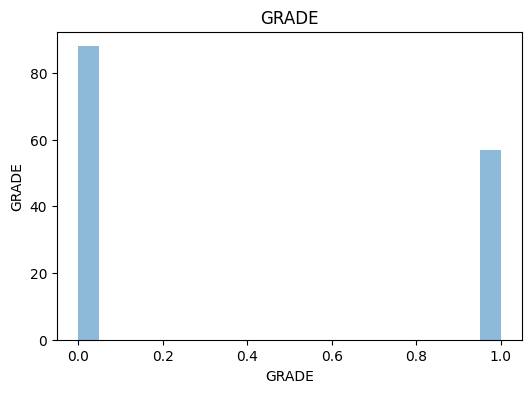

<Figure size 600x400 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
for column in d.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(d[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("GRADE")
    plt.title(f"{column}")
    plt.show()
plt.figure(figsize=(6, 4))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(X_test)
print(y_test)
print(y_train)

(101, 31)
(44, 31)
     AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  SALARY  \
73     2       2        2            4     2         2        2       1   
140    2       1        2            3     1         1        2       1   
50     2       2        2            3     2         2        1       2   
129    1       1        2            3     1         1        2       1   
42     2       2        2            3     2         1        2       1   
34     1       2        1            3     2         2        1       2   
87     2       2        2            3     2         1        2       2   
109    1       2        1            3     2         1        1       1   
59     2       2        2            3     2         1        1       1   
118    1       2        2            5     2         1        1       1   
44     2       2        3            3     2         2        1       1   
41     3       2        2            3     1         2        2       2   
124   

In [22]:
# naive bayes #
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# Standardizing the features
# Although normalization is not strictly required for Naive Bayes, it can be beneficial, especially for Gaussian Naive Bayes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

Accuracy: 0.6136363636363636
Confusion Matrix:
[[17  8]
 [ 9 10]]


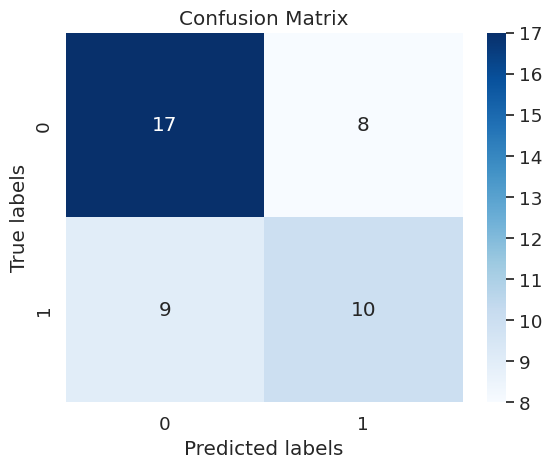

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        25
           1       0.56      0.53      0.54        19

    accuracy                           0.61        44
   macro avg       0.60      0.60      0.60        44
weighted avg       0.61      0.61      0.61        44



In [65]:
# Predicting the test set results
y_pred = gnb.predict(X_test)

# Evaluating the model
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_NB)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

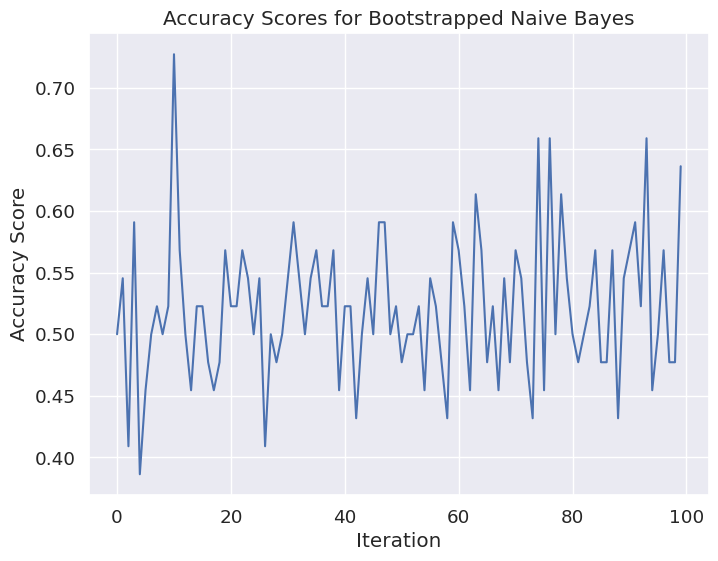

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Naive Bayes model
model = GaussianNB()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Naive Bayes model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Naive Bayes model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Naive Bayes")
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.6136363636363636
Accuracy: 0.6136363636363636
Confusion Matrix:
[[19  6]
 [11  8]]


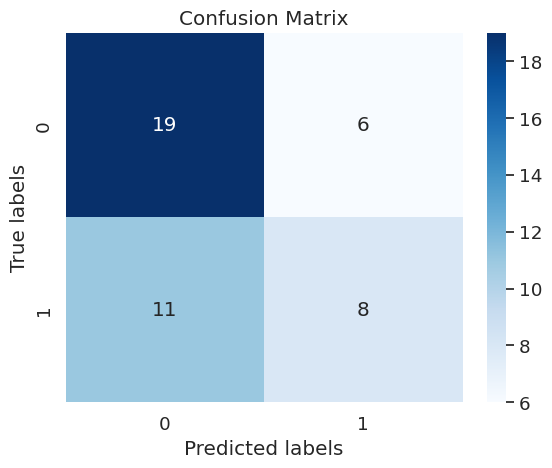

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        25
           1       0.57      0.42      0.48        19

    accuracy                           0.61        44
   macro avg       0.60      0.59      0.59        44
weighted avg       0.61      0.61      0.60        44



In [64]:
# Predict on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_DT= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

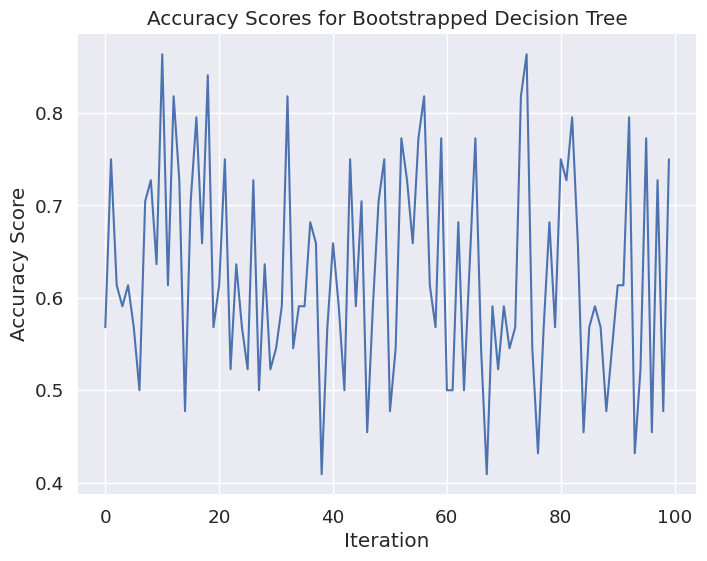

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Decision Tree model
model = DecisionTreeClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Decision Tree model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Decision Tree model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Decision Tree")
plt.show()

In [30]:
#multi-layer perceptrons#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

Accuracy: 0.5909090909090909
Confusion Matrix:
[[19  6]
 [12  7]]


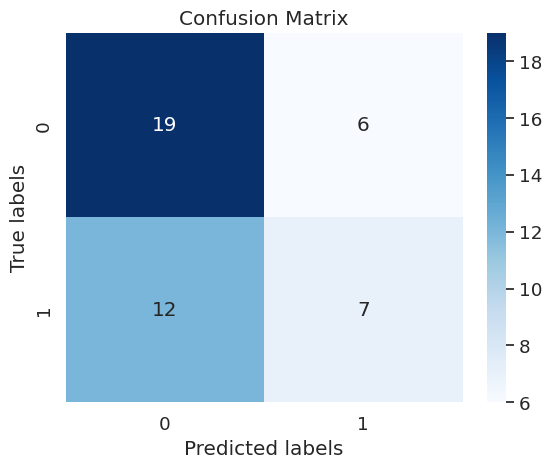

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        25
           1       0.54      0.37      0.44        19

    accuracy                           0.59        44
   macro avg       0.58      0.56      0.56        44
weighted avg       0.58      0.59      0.57        44



In [63]:
# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
accuracy_MLP = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_MLP)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

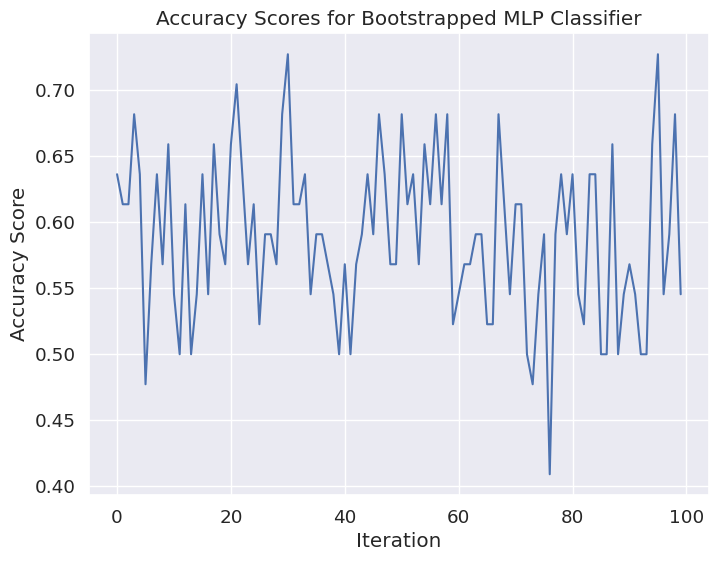

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an MLP classifier model
model = MLPClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the MLP classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the MLP classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped MLP Classifier")
plt.show()


In [35]:
pip install lightgbm


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Creating LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Setting parameters
# Note: These are basic parameters. LightGBM offers a wide range of parameters that can be tuned for improved performance.
params = {
'objective': 'binary',
'metric': 'binary_logloss',
'boosting': 'gbdt',
'learning_rate': 0.05,
'num_leaves': 31,
'max_depth': -1,
}

# Train the model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Predicting on the test set
y_pred = gbm.predict(X_test)
# Converting probabilities to class labels based on a threshold (0.5)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]

[LightGBM] [Info] Number of positive: 38, number of negative: 63
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 101, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376238 -> initscore=-0.505549
[LightGBM] [Info] Start training from score -0.505549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Accuracy: 0.7954545454545454
Confusion Matrix:
[[21  4]
 [ 5 14]]


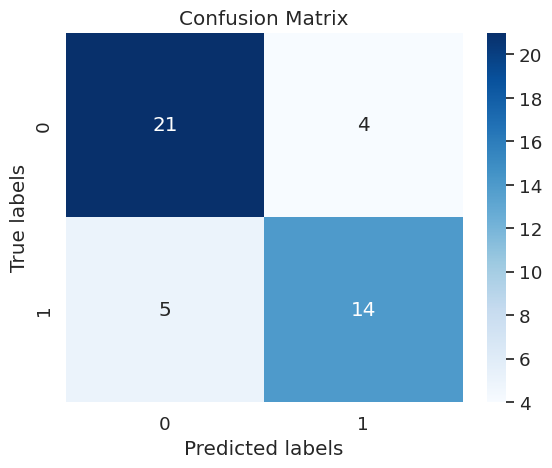

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.78      0.74      0.76        19

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.79      0.80      0.79        44



In [62]:
# Evaluating the model
accuracy_LGBM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LGBM)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

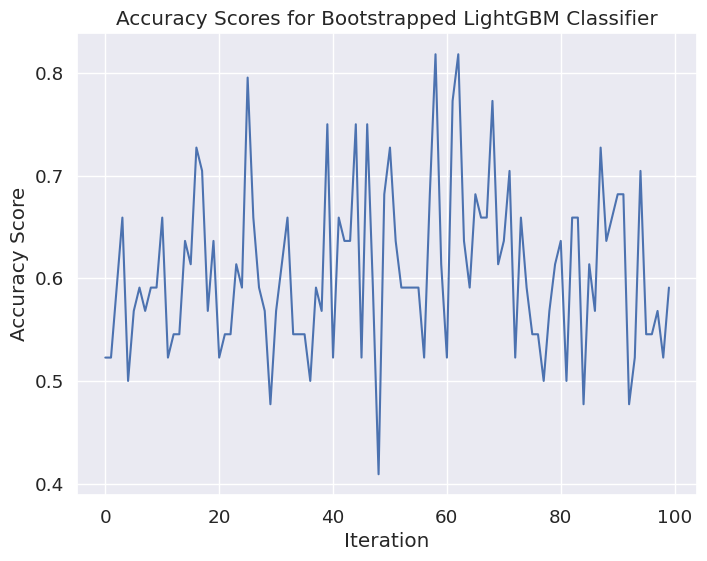

In [74]:
import lightgbm as lgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a LightGBM classifier model
model = lgb.LGBMClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the LightGBM classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the LightGBM classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped LightGBM Classifier")
plt.show()


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy_p = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_p)
print(classification_report(y_test, y_pred))

Cost after iteration 0: 0.6914448976781937
Cost after iteration 100: 0.5825872377348525
Cost after iteration 200: 0.5305118600999479
Cost after iteration 300: 0.4985052094635215
Cost after iteration 400: 0.4761713816422594
Cost after iteration 500: 0.4594760627224908
Cost after iteration 600: 0.4464447544127503
Cost after iteration 700: 0.43595680162974304
Cost after iteration 800: 0.4273141278946957
Cost after iteration 900: 0.42005459164109493
 [0.6914448976781937, 0.6897607238012621, 0.688094418110896, 0.6864457424060283, 0.6848144611165495, 0.6832003413148147, 0.6816031527249637, 0.6800226677301398, 0.6784586613776822, 0.6769109113823673, 0.6753791981277862, 0.6738633046659247, 0.6723630167150305, 0.6708781226558367, 0.6694084135262167, 0.6679536830143471, 0.6665137274504442, 0.665088345797146, 0.6636773396386108, 0.6622805131683922, 0.6608976731761657, 0.6595286290333607, 0.6581731926777656, 0.656831178597165, 0.655502403812066, 0.6541866878575734, 0.6528838527644637, 0.6515937230

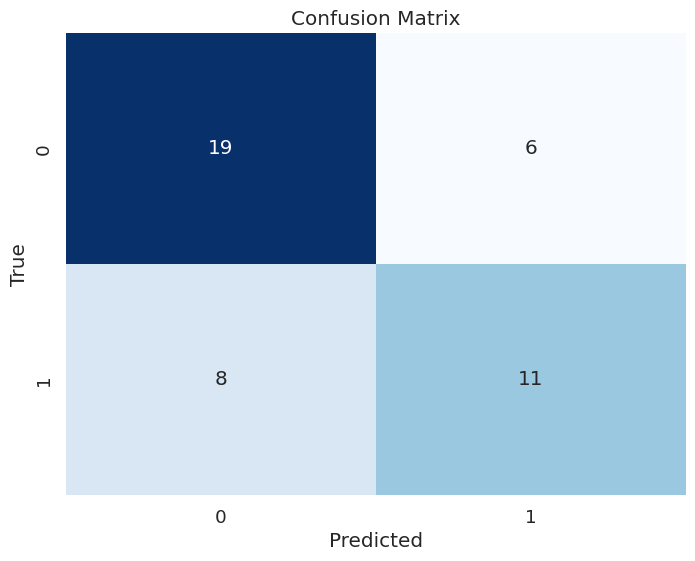

Accuracy is: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.65      0.58      0.61        19

    accuracy                           0.68        44
   macro avg       0.68      0.67      0.67        44
weighted avg       0.68      0.68      0.68        44



In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined x_train, y_train, x_test, and y_test somewhere in your code
# Split your data into training and testing sets


# Standardize your features if needed
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:", accuracy_LR)
print(classification_report(y_test, y_pred))




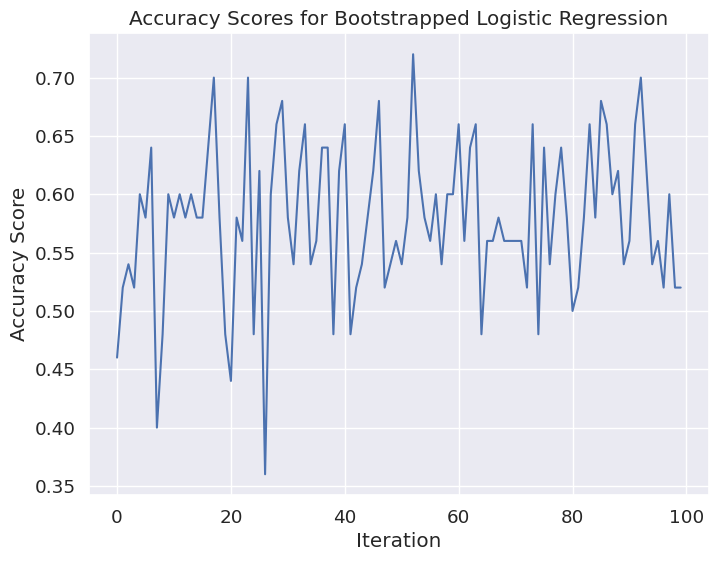

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap_samples = 50
n_iterations = 100
model = LogisticRegression()
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)


    y_p = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Logistic Regression")
plt.show()

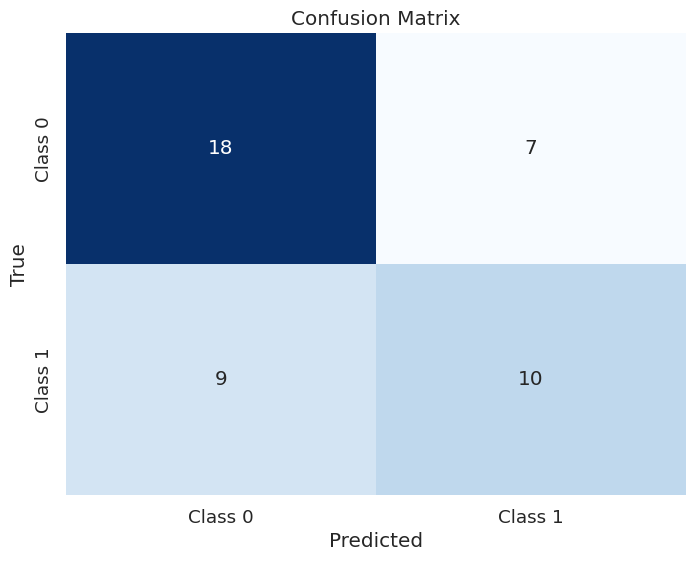

Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.59      0.53      0.56        19

    accuracy                           0.64        44
   macro avg       0.63      0.62      0.62        44
weighted avg       0.63      0.64      0.63        44



In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined x_train, y_train, x_test, and y_test somewhere in your code
# Split your data into training and testing sets


# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))



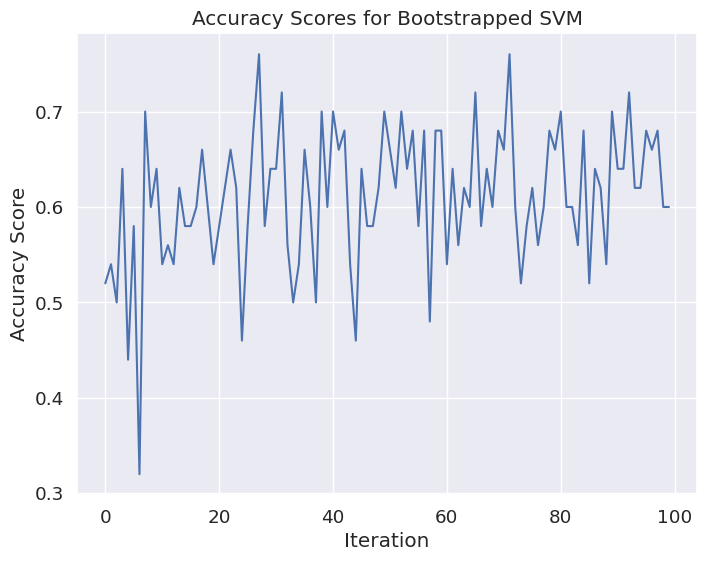

In [51]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an SVM model
model = SVC()

# Fit the SVM model to your test data (x_test, y_test)
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Predict using the SVM model
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped SVM")
plt.show()

In [52]:
pip install xgboost

Accuracy: 0.7954545454545454
Confusion Matrix:
[[21  4]
 [ 5 14]]


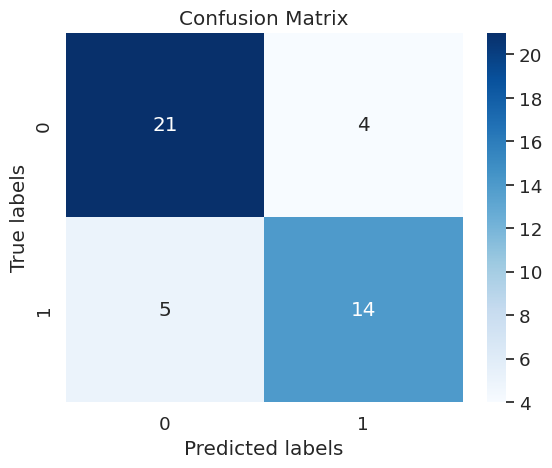

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.78      0.74      0.76        19

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.79      0.80      0.79        44



In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy_XGB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_XGB)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


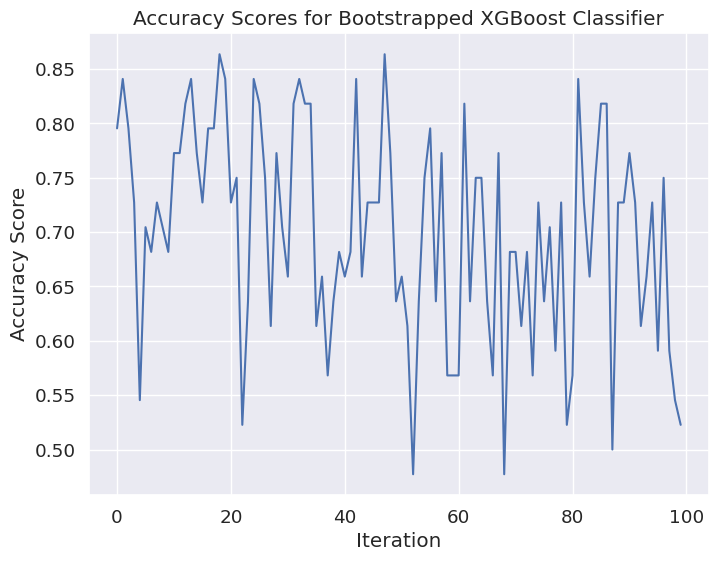

In [75]:
import xgboost as xgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an XGBoost classifier model
model = xgb.XGBClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the XGBoost classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the XGBoost classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped XGBoost Classifier")
plt.show()


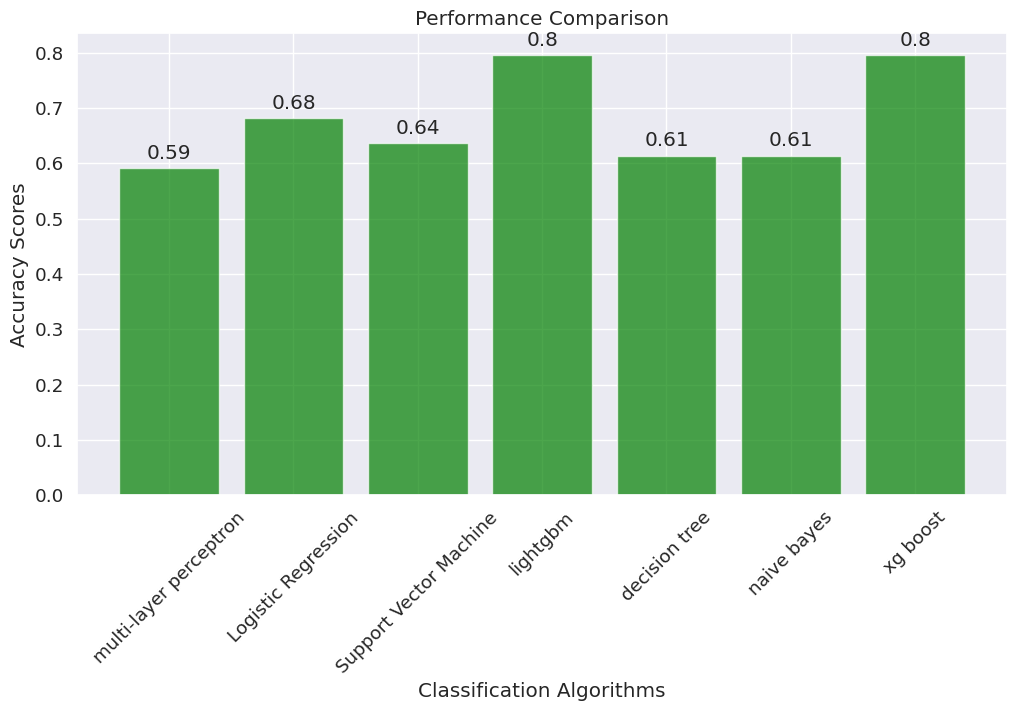

In [77]:
import matplotlib.pyplot as plt

algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_MLP, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Confusion Matrix : 
 [[17  8]
 [13  6]]


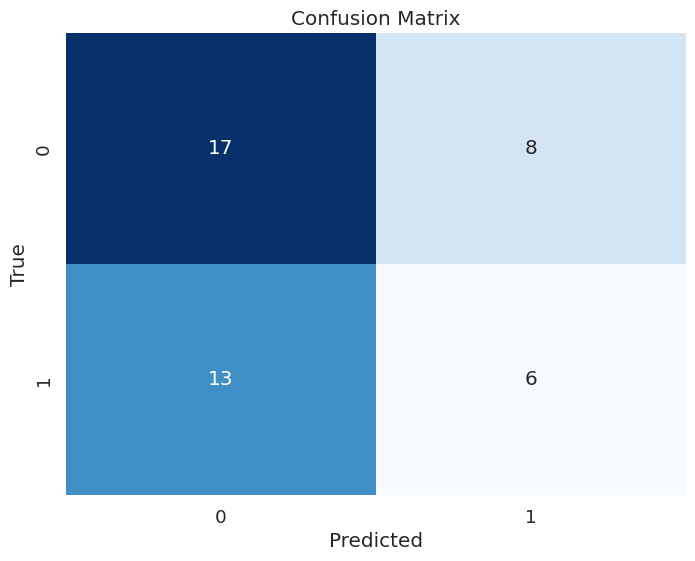

Accuracy: 0.5227272727272727
Precision: 0.5070346320346321
Recall: 0.5227272727272727
F1-score: 0.5082644628099174


In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

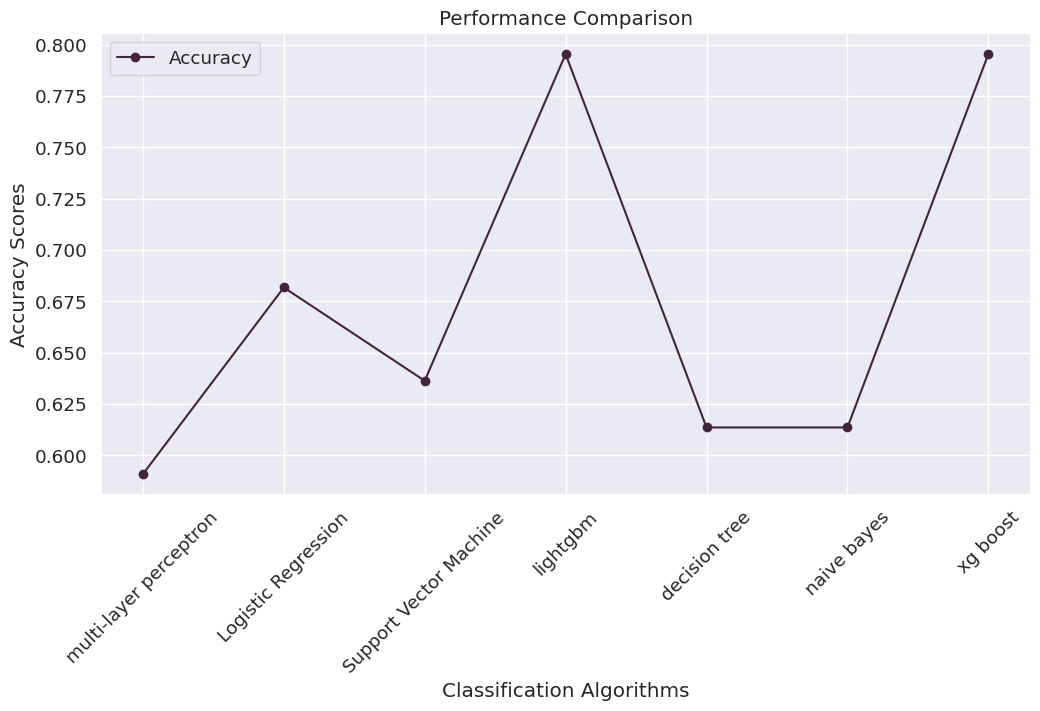

In [79]:
algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_MLP, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()
